<a href="https://colab.research.google.com/github/Noob919/PET-EXPERIMENT/blob/main/pet_DTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df =  pd.read_csv("/content/AGED PET MP.csv")

In [3]:
df.rename(columns={'Unnamed: 5': "label"}, errors="raise",inplace =  True)

In [4]:
df_res =  df[['time', 'tem', 'heating rate', 'DTG']]

In [5]:
label = df['label']
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root'])
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

In [6]:
transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df = pd.concat([transform_df,root_series(df_res)],axis=1)
transform_df.columns = ['time', 'tem', 'heating rate', 'DTG','Root']
transform_df

,time,tem,heating rate,DTG,Root
0,0.000000e+00,1.000000,0.000000,3.980602e-05,311.840000
1,8.906751e-07,0.016664,0.999861,6.633627e-07,18712.398403
2,3.561446e-06,0.033315,0.999445,1.237841e-06,9359.495391
3,8.007957e-06,0.049938,0.998752,1.988073e-06,6243.790134
4,1.422212e-05,0.066519,0.997785,2.648112e-06,4687.532144
...,...,...,...,...,...
4049,6.909666e-02,0.997500,0.014781,-1.492915e-05,976.651182
4050,6.910235e-02,0.997500,0.014778,-1.492301e-05,976.811916
4051,6.910734e-02,0.997500,0.014774,-1.491672e-05,976.982627
4052,6.911302e-02,0.997499,0.014770,-1.491058e-05,977.143362


In [7]:
dataframe = pd.concat([transform_df,label],axis =1)
dataframe

,time,tem,heating rate,DTG,Root,label
0,0.000000e+00,1.000000,0.000000,3.980602e-05,311.840000,Training
1,8.906751e-07,0.016664,0.999861,6.633627e-07,18712.398403,Training
2,3.561446e-06,0.033315,0.999445,1.237841e-06,9359.495391,Training
3,8.007957e-06,0.049938,0.998752,1.988073e-06,6243.790134,Training
4,1.422212e-05,0.066519,0.997785,2.648112e-06,4687.532144,Training
...,...,...,...,...,...,...
4049,6.909666e-02,0.997500,0.014781,-1.492915e-05,976.651182,Training
4050,6.910235e-02,0.997500,0.014778,-1.492301e-05,976.811916,Training
4051,6.910734e-02,0.997500,0.014774,-1.491672e-05,976.982627,Training
4052,6.911302e-02,0.997499,0.014770,-1.491058e-05,977.143362,Training


In [8]:
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG']
Root = df_training['Root']

In [9]:
from sklearn.tree import DecisionTreeRegressor
DTCLF = DecisionTreeRegressor()
DTCLF.fit(X,y)

DecisionTreeRegressor()

For Validation Set

In [10]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG']
predictions_val = DTCLF.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val

,0
0,0.000006
1,0.000011
2,0.000016
3,0.000017
4,0.000017
...,...
400,-0.000015
401,-0.000015
402,-0.000015
403,-0.000015


In [11]:
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 2.725313972062452e-13
RMSE 5.220453976487535e-07
MAE 2.033795351520293e-07
R2_Score 0.9997275362052838


In [12]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)

In [13]:
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,DTG
0,0.000088,0.164399,0.986394,0.000006,0.000007
1,0.000306,0.301892,0.953342,0.000011,0.000012
2,0.000630,0.422885,0.906183,0.000016,0.000016


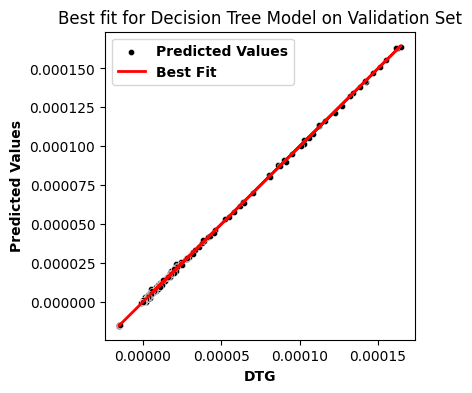

In [15]:
x = final_df['DTG']
y = final_df['preditions']

# Calculate the best-fit line coefficients
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='red', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Decision Tree Model on Validation Set')
plt.xlabel('DTG',fontsize=10, fontweight='bold')  # Set the x-axis label to 'DTG'
plt.ylabel('Predicted Values',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

Test Set

In [16]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG']
Root_test = df_test['Root']

In [17]:
predictions_test = DTCLF.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

,0
0,0.000003
1,0.000013
2,0.000015
3,0.000017
4,0.000017
...,...
401,-0.000015
402,-0.000015
403,-0.000015
404,-0.000015


In [18]:
print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 3.206062995447676e-13
RMSE 5.662210694991556e-07
MAE 2.1800051268090734e-07
R2_Score 0.9996769669007007


In [19]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
X_test_df

,time,tem,heating rate
0,0.000022,0.083045,0.996546
1,0.000337,0.316228,0.948683
2,0.000550,0.397607,0.917555
3,0.000983,0.514496,0.857493
4,0.001692,0.640183,0.768220
...,...,...,...
401,0.068849,0.997515,0.014940
402,0.068903,0.997512,0.014907
403,0.068976,0.997508,0.014862
404,0.069053,0.997503,0.014814


In [20]:
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,0.000022,0.083045,0.996546,0.000003,0.000003
1,0.000337,0.316228,0.948683,0.000013,0.000013
2,0.000550,0.397607,0.917555,0.000015,0.000016
3,0.000983,0.514496,0.857493,0.000017,0.000018
4,0.001692,0.640183,0.768220,0.000017,0.000017
...,...,...,...,...,...
401,0.068849,0.997515,0.014940,-0.000015,-0.000015
402,0.068903,0.997512,0.014907,-0.000015,-0.000015
403,0.068976,0.997508,0.014862,-0.000015,-0.000015
404,0.069053,0.997503,0.014814,-0.000015,-0.000015


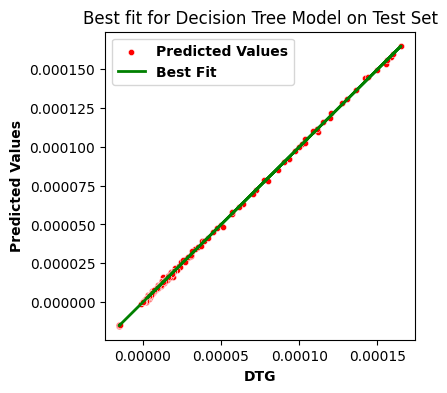

In [22]:
x = final_df_test['DTG']
y = final_df_test['predictions_test']

# Calculate the best-fit line coefficients
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='Red', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='green', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Decision Tree Model on Test Set')
plt.xlabel('DTG',fontsize=10, fontweight='bold')  # Set the x-axis label to 'DTG'
plt.ylabel('Predicted Values',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

Random Forest For Validation Set

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rfc = RandomForestRegressor()

df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG']
Root = df_training['Root']

rfc.fit(X,y)

df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG']
Root_val = df_val['Root']
predictions_val = rfc.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 1.46437198915276e-13
RMSE 3.8267113676795116e-07
MAE 1.919429272520779e-07
R2_Score 0.9998535991254105


In [25]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,DTG
0,0.000088,0.164399,0.986394,0.000006,0.000007
1,0.000306,0.301892,0.953342,0.000012,0.000012
2,0.000630,0.422885,0.906183,0.000016,0.000016


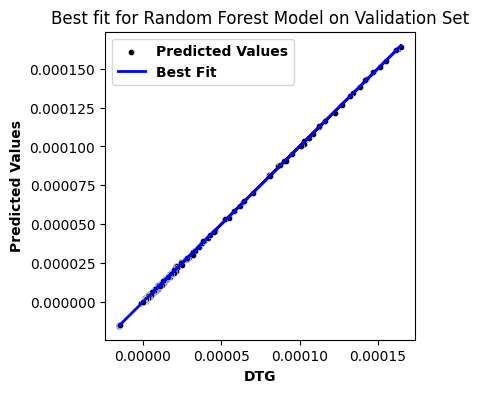

In [26]:
x = final_df['DTG']
y = final_df['preditions']

# Calculate the best-fit line coefficients
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='black', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='Blue', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Random Forest Model on Validation Set')
plt.xlabel('DTG',fontsize=10, fontweight='bold')  # Set the x-axis label to 'DTG'
plt.ylabel('Predicted Values',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

Random Forest on Test Set

In [27]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG']
Root_test = df_test['Root']
predictions_test = rfc.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 2.597249693484965e-13
RMSE 5.09632190259305e-07
MAE 2.3338062867273452e-07
R2_Score 0.9997383090664993


In [28]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,0.000022,0.083045,0.996546,0.000003,0.000003
1,0.000337,0.316228,0.948683,0.000013,0.000013
2,0.000550,0.397607,0.917555,0.000015,0.000016
3,0.000983,0.514496,0.857493,0.000017,0.000018
4,0.001692,0.640183,0.768220,0.000017,0.000017
...,...,...,...,...,...
401,0.068849,0.997515,0.014940,-0.000015,-0.000015
402,0.068903,0.997512,0.014907,-0.000015,-0.000015
403,0.068976,0.997508,0.014862,-0.000015,-0.000015
404,0.069053,0.997503,0.014814,-0.000015,-0.000015


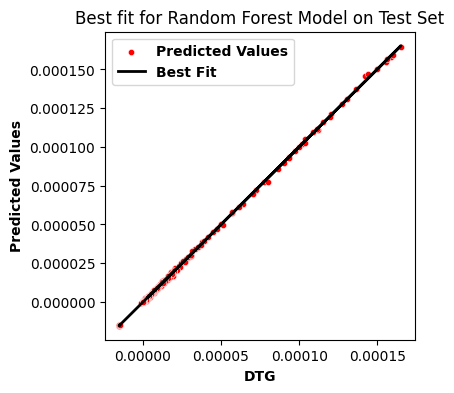

In [30]:
x = final_df_test['DTG']
y = final_df_test['predictions_test']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='Red', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='black', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Random Forest Model on Test Set')
plt.xlabel('DTG',fontsize=10, fontweight='bold')  # Set the x-axis label to 'DTG'
plt.ylabel('Predicted Values',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

Support Vector Machine

In [31]:
from sklearn.svm import SVR

svr = SVR()

df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG']
Root = df_training['Root']
svr.fit(X,y)

df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG']
Root_val = df_val['Root']
predictions_val = svr.predict(X_val)
prediction_val  = pd.DataFrame(predictions_val)
prediction_val
print('MSE',mean_squared_error(y_val,predictions_val))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions_val)))
print('MAE',mean_absolute_error(y_val,predictions_val))
print('R2_Score',r2_score(y_val,predictions_val))

MSE 4.651525320615787e-09
RMSE 6.820209176129268e-05
MAE 6.664760005803122e-05
R2_Score -3.6503714913798895


In [32]:
X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
X_val_df
prediction = pd.DataFrame(predictions_val)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df.head(3)

,time,tem,heating rate,preditions,DTG
0,0.000088,0.164399,0.986394,0.000075,0.000007
1,0.000306,0.301892,0.953342,0.000075,0.000012
2,0.000630,0.422885,0.906183,0.000075,0.000016


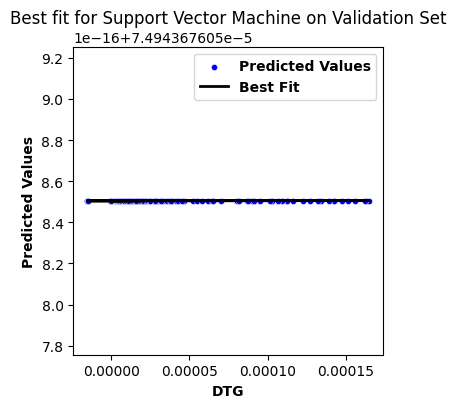

In [34]:
x = final_df['DTG']
y = final_df['preditions']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='blue', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='black', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Support Vector Machine on Validation Set')
plt.xlabel('DTG',fontsize=10, fontweight='bold')  # Set the x-axis label to 'DTG'
plt.ylabel('Predicted Values',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

SVM for Test Set

In [35]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG']
Root_test = df_test['Root']
predictions_test = svr.predict(X_test)
prediction_test  = pd.DataFrame(predictions_test)
prediction_test

print('MSE',mean_squared_error(y_test,predictions_test))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions_test)))
print('MAE',mean_absolute_error(y_test,predictions_test))
print('R2_Score',r2_score(y_test,predictions_test))

MSE 4.650451378930158e-09
RMSE 6.819421807550959e-05
MAE 6.660732903446723e-05
R2_Score -3.685652540856358


In [36]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions_test)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,0.000022,0.083045,0.996546,0.000075,0.000003
1,0.000337,0.316228,0.948683,0.000075,0.000013
2,0.000550,0.397607,0.917555,0.000075,0.000016
3,0.000983,0.514496,0.857493,0.000075,0.000018
4,0.001692,0.640183,0.768220,0.000075,0.000017
...,...,...,...,...,...
401,0.068849,0.997515,0.014940,0.000075,-0.000015
402,0.068903,0.997512,0.014907,0.000075,-0.000015
403,0.068976,0.997508,0.014862,0.000075,-0.000015
404,0.069053,0.997503,0.014814,0.000075,-0.000015


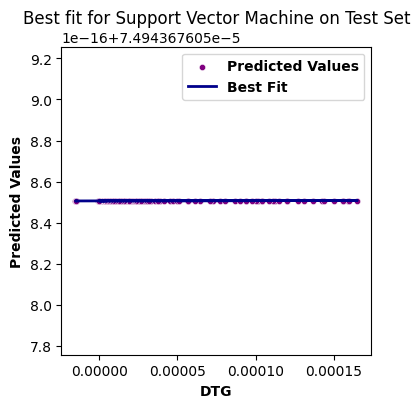

In [37]:
x = final_df_test['DTG']
y = final_df_test['predictions_test']
a, b = np.polyfit(x, y, 1)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))  # Adjust the width and height as needed

# Create a scatter plot using Seaborn with custom styling
sns.scatterplot(x=x, y=y, color='purple', label='Predicted Values', s=20)

# Plot the best fit line with a specified line width
plt.plot(x, a * x + b, color='darkblue', label='Best Fit', linewidth=2)

# Set the grid size and style
#plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Best fit for Support Vector Machine on Test Set')
plt.xlabel('DTG',fontsize=10, fontweight='bold')  # Set the x-axis label to 'DTG'
plt.ylabel('Predicted Values',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()